<a href="https://colab.research.google.com/github/MohammedQaraad/DeepleerningTF/blob/master/RegressionTensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
x_data= np.linspace(0.0,10.0,1000000)
x_data.shape

In [0]:
noise= np.random.random(len(x_data))
noise.shape
noise[:5]

array([0.16169696, 0.74380596, 0.35525118, 0.4787403 , 0.32374641])

In [0]:
#assign random value to M and b and calculate
#y_true = m *x + b + noise
#we added noise to our dataset due our x_data is 
#very coorelated 
b=5
m=0.5
y_true= (m * x_data) + b + noise
print(y_true.shape)
y_true[:5]

In [0]:

x_df= pd.DataFrame(data=x_data, columns=['X Data'])
y_df= pd.DataFrame(data=y_true, columns=['Y'])
x_df.head()

In [0]:
#concatination x_df with y_df column by column7
my_data = pd.concat([x_df,y_df],axis=1)
my_data.shape
#(1000000,2)
my_data.head()

In [0]:
my_data.sample(n=1000).plot(kind='scatter',x='X Data', y='Y')

In [0]:
#create model to fit data 
batch_size = 8
m=tf.Variable(0.1)
b= tf.Variable(1.0)
init=tf.global_variables_initializer()

In [0]:
xph= tf.placeholder(tf.float32,[batch_size])
yph= tf.placeholder(tf.float32,[batch_size])

In [0]:
y_model = m* xph + b

In [0]:
error = tf.reduce_sum(tf.square(yph-y_model))
#(yph - y model)**2

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [0]:
train = optimizer.minimize(error)

In [0]:
with tf.Session() as sess:
  sess.run(init)
  batches = 528  #number of epoch
  for i in range(batches):
    #shuffle
    rand_ind= np.random.randint(len(x_data), size=batch_size)
    feed={xph:x_data[rand_ind], yph:y_true[rand_ind]}
    sess.run(train,feed_dict=feed)
  model_m, model_b = sess.run([m,b])
    
    

In [0]:
model_m , model_b

(0.57146347, 4.9370403)

In [0]:
y_hat = x_data * model_m + model_b

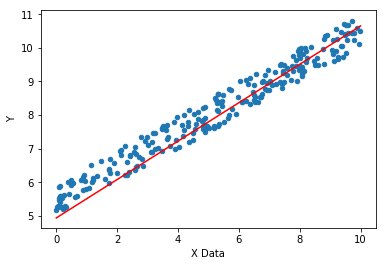

In [0]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y= 'Y')
plt.plot(x_data,y_hat,'r')